In [1]:
import sys
import os
import numpy as np
import pandas as pd
import nibabel as nb
import torch
import matplotlib.pyplot as plt
sys.path.append('/host/d/Github')
import whole_heart_segmentation_ZC.functions_collection as ff
import whole_heart_segmentation_ZC.Data_processing as Data_processing
import whole_heart_segmentation_ZC.Build_lists.Build_list as Build_list
import whole_heart_segmentation_ZC.data_loader.random_aug as random_aug
import whole_heart_segmentation_ZC.data_loader.generator as generator
from torch.utils.data import Dataset, DataLoader


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15]


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### step 1: define trial name

In [2]:
trial_name = 'trial'

### step 2: build patient list

In [3]:
# change the excel path to your own path
patient_list_spreadsheet = os.path.join('/host/d/Data/WHS/Patient_lists/train_val_path_list.xlsx')
build_sheet =  Build_list.Build(patient_list_spreadsheet)
# train
batch_list, modality_list, center_list, patient_id_list, size_x_list, size_y_list, size_z_list, img_file_list, seg_file_list = build_sheet.__build__(batch_list = [0])  # just as an example, use batch 0 for train

# # define val
# _,_,input_file_val, reference_file_val = build_sheet.__build__(batch_list = [1])  # just as an example, use the same batch for val
print('give me an example of image file and seg file:', img_file_list[0], seg_file_list[0])
print('total number of training cases:', len(img_file_list))


give me an example of image file and seg file: /host/d/Data/WHS/current_challenge/original_data/CT/centerA/1003/image.nii.gz /host/d/Data/WHS/current_challenge/original_data/CT/centerA/1003/label.nii.gz
total number of training cases: 17


### data generator

In [8]:
# define this generator
generator_train = generator.Dataset_CMR(
            image_file_list = img_file_list,
            seg_file_list = seg_file_list,

            shuffle = True,
            image_normalization = True,
            augment = True,
            augment_frequency = 1.0,
    )

In [9]:
ds = generator_train
dl = DataLoader(ds, batch_size = 1, shuffle = False, pin_memory = True, num_workers = 0)# cpu_count())

loading image file: /host/d/Data/WHS/current_challenge/original_data/MR/centerE/5026/image.nii.gz  seg file: /host/d/Data/WHS/current_challenge/original_data/MR/centerE/5026/label.nii.gz
after augmentation, image min: 0.0  max: 1.0
batch image size: torch.Size([1, 1, 128, 128, 5])


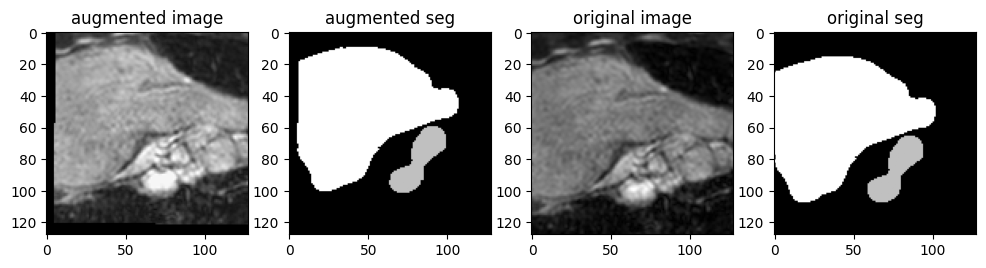

In [10]:
for batch_data in dl:
    batch_image = batch_data['image']
    batch_seg = batch_data['mask']
    batch_image_size = batch_data['image_size']
    batch_original_image = batch_data['original_image']
    batch_original_seg = batch_data['original_seg']

    print('batch image size:', batch_image.shape)
    

    # plot image, seg, original image, original seg side by side
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(1,4,1)
    ax1.imshow(batch_image[0,0,:,:,batch_image_size[2]//2], cmap='gray')
    ax1.set_title('augmented image')
    ax2 = fig.add_subplot(1,4,2)
    ax2.imshow(batch_seg[0,0,:,:,batch_image_size[2]//2], cmap='gray')
    ax2.set_title('augmented seg')      
    ax3 = fig.add_subplot(1,4,3)
    ax3.imshow(batch_original_image[0,0,:,:,batch_image_size[2]//2], cmap='gray')
    ax3.set_title('original image')
    ax4 = fig.add_subplot(1,4,4)
    ax4.imshow(batch_original_seg[0,0,:,:,batch_image_size[2]//2], cmap='gray')
    ax4.set_title('original seg')
    plt.show()

    break

In [ ]:
# # build model
# import argparse
# import os

# def get_args_parser( vit_type = "vit_h"):
#     parser = argparse.ArgumentParser('SAM fine-tuning', add_help=True)

#     parser.add_argument('--resume', default = 'weights')

#     parser.add_argument('--img_size', default=128, type=int) 

#     parser.add_argument('--vit_type', default=vit_type, type=str, choices=[ 'vit_b', 'vit_l', 'vit_h'],)
    
 
#     return parser

# import Whole_heart_segmentation_junzhe.segment_anything.model as model
# args = get_args_parser(vit_type = "vit_h")
# args = args.parse_args([])

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.build_model(args, device)

FileNotFoundError: [Errno 2] No such file or directory: 'weights'

In [ ]:


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
for batch in dl:
    dictionary = batch
    images = dictionary['image']
    segs = dictionary['mask']
    
    # put into GPU if needed
    images = images.to(device)
    segs = segs.to(device)

    print('shape of images:', images.shape, ' shape of segs:', segs.shape)

    output = model(images)


    

loading image file: /host/d/GitHub/Whole_heart_segmentation_junzhe/example_data/data/ID_0002/img/slice_3.nii.gz  seg file: /host/d/GitHub/Whole_heart_segmentation_junzhe/example_data/data/ID_0002/seg/slice_3.nii.gz
after augmentation, image min: 0.0  max: 1.0
loading image file: /host/d/GitHub/Whole_heart_segmentation_junzhe/example_data/data/ID_0002/img/slice_0.nii.gz  seg file: /host/d/GitHub/Whole_heart_segmentation_junzhe/example_data/data/ID_0002/seg/slice_0.nii.gz
after augmentation, image min: 0.0  max: 1.0
loading image file: /host/d/GitHub/Whole_heart_segmentation_junzhe/example_data/data/ID_0002/img/slice_5.nii.gz  seg file: /host/d/GitHub/Whole_heart_segmentation_junzhe/example_data/data/ID_0002/seg/slice_5.nii.gz
after augmentation, image min: 0.0  max: 1.0
shape of images: torch.Size([3, 1, 128, 128])  shape of segs: torch.Size([3, 1, 128, 128])
loading image file: /host/d/GitHub/Whole_heart_segmentation_junzhe/example_data/data/ID_0002/img/slice_1.nii.gz  seg file: /host/